Utkarsh Gaikwad                       
Data Wrangling II  
Create an “Academic performance” dataset of students and perform the following  
operations using Python.  
1) Scan all variables for missing values and inconsistencies. If there are missing  
values and/or inconsistencies, use any of the suitable techniques to deal with  
them.  
2) Scan all numeric variables for outliers. If there are outliers, use any of the  
suitable techniques to deal with them.  
3) Apply data transformations on at least one of the variables. The purpose of this  
transformation should be one of the following reasons: to change the scale for  
better understanding of the variable, to convert a non-linear relation into a  
linear one, or to decrease the skewness and convert the distribution into a  
normal distribution.

Importing Libraries

In [1]:
import pandas as pd

load data into a DataFrame object

In [2]:
df=pd.DataFrame({'Roll_no':[1,2,3,4,5,6,7,8,9,10],'Name':["Rucha","Komal","Prajakta","Anagha","Samruddhi","Priyanka","gita","vaishnavi","Shraddha","Diksha"],
                 'Maths_mark':[90,80,70,400,40,80,85,2,63,78],
                 'English_mark':[600,72,82,63,69,92,53,76,98,94] },index=[1,3,4,5,7,9,10,13,18,19])
df=df.reindex([1,2,3,4,5,6,7,8,9,10])

Returns Boolean Value as 'Trie' for NULL values

In [3]:
df.isnull()

,Roll_no,Name,Maths_mark,English_mark
1,False,False,False,False
2,True,True,True,True
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,True,True,True,True
7,False,False,False,False
8,True,True,True,True
9,False,False,False,False
10,False,False,False,False


Returns a new DataFrame object unless the inplace parameter is set to True

In [ ]:
df.fillna(method="pad",inplace=True)

In [ ]:
print(df)

    Roll_no       Name  Maths_mark  English_mark
1       1.0      Rucha        90.0         600.0
2       1.0      Rucha        90.0         600.0
3       2.0      Komal        80.0          72.0
4       3.0   Prajakta        70.0          82.0
5       4.0     Anagha       400.0          63.0
6       4.0     Anagha       400.0          63.0
7       5.0  Samruddhi        40.0          69.0
8       5.0  Samruddhi        40.0          69.0
9       6.0   Priyanka        80.0          92.0
10      7.0       gita        85.0          53.0


Returns description of the data in the DataFrame

In [ ]:
df.describe()

,Roll_no,Maths_mark,English_mark
count,10.000000,10.000000,10.000000
mean,3.800000,137.500000,176.300000
std,2.043961,139.547881,223.563091
min,1.000000,40.000000,53.000000
25%,2.250000,72.500000,64.500000
50%,4.000000,82.500000,70.500000
75%,5.000000,90.000000,89.500000
max,7.000000,400.000000,600.000000


 boxplot()- Provide a quick visual summary of the variability of values in a dataset

<Axes: >

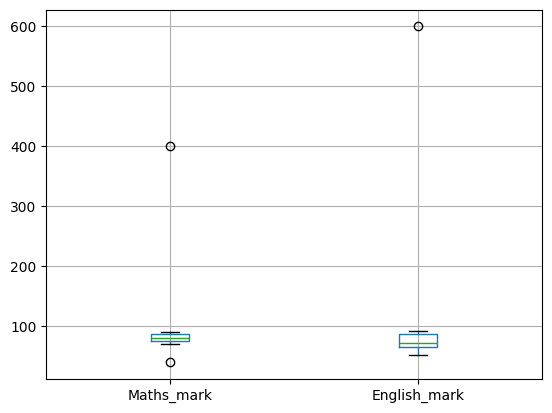

In [4]:
import numpy as np
numeric_col=['Maths_mark','English_mark']
categorical_col=['Roll_no','Name','Grade']
df.boxplot(numeric_col)

quantile()- Returns values at the given quantile over the requested axis

In [ ]:
Q1=df[numeric_col].quantile(0.25)
Q3=df[numeric_col].quantile(0.75)
IQR=Q1-Q3
print(IQR)
print(Q1)
print(Q3)

Maths_mark     -17.5
English_mark   -23.0
dtype: float64
Maths_mark      72.5
English_mark    69.0
Name: 0.25, dtype: float64
Maths_mark      90.0
English_mark    92.0
Name: 0.75, dtype: float64


Uses to identify outliers by default.                           
A data point is an outlier if it is more than 1.5

In [ ]:
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker)
print(Upper_Whisker)

Maths_mark       98.75
English_mark    103.50
dtype: float64
Maths_mark      63.75
English_mark    57.50
dtype: float64


Remove outliers from DataFrame

In [ ]:
df_out=df[numeric_col][~((df[numeric_col]<(Q1-1.5*IQR))|(df[numeric_col])>(Q3+1.5*IQR))]
print(df_out)

    Maths_mark  English_mark
1         90.0         600.0
2         90.0         600.0
3         80.0          72.0
4         70.0          82.0
5        400.0          63.0
6        400.0          63.0
7         40.0          69.0
8         40.0          69.0
9         80.0          92.0
10        85.0          53.0
